## Final Project - Prophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [55]:
df = pd.read_excel("days.xlsx")
df.head()

date  bikes rented
0 2011-01-01           985
1 2011-01-02           801
2 2011-01-03          1349
3 2011-01-04          1562
4 2011-01-05          1600

In [56]:
df.sort_values(by= 'date')

date  bikes rented
0   2011-01-01           985
1   2011-01-02           801
2   2011-01-03          1349
3   2011-01-04          1562
4   2011-01-05          1600
..         ...           ...
726 2012-12-27          2114
727 2012-12-28          3095
728 2012-12-29          1341
729 2012-12-30          1796
730 2012-12-31          2729

[731 rows x 2 columns]

In [57]:
# Run the Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['bikes rented'])
print(result)

(-1.8774481444374302, 0.3427434403392191, 13, 717, {'1%': -3.439503230053971, '5%': -2.8655794463678346, '10%': -2.5689210707289982}, 11740.390931163352)


In [65]:
#df = df.diff(1).dropna()
#from statsmodels.tsa.stattools import adfuller
#result = adfuller(df['bikes rented'])
#print(result)

In [60]:
av=df.rename(columns={'date': 'ds', 'bikes rented': 'y'})

In [61]:
# Instantiate Prophet class
m=Prophet(daily_seasonality=True)
m.fit(av)

In [62]:
# Forecast the future 2 years
future = m.make_future_dataframe(periods =24, freq ='M')
forecast = m.predict(future)

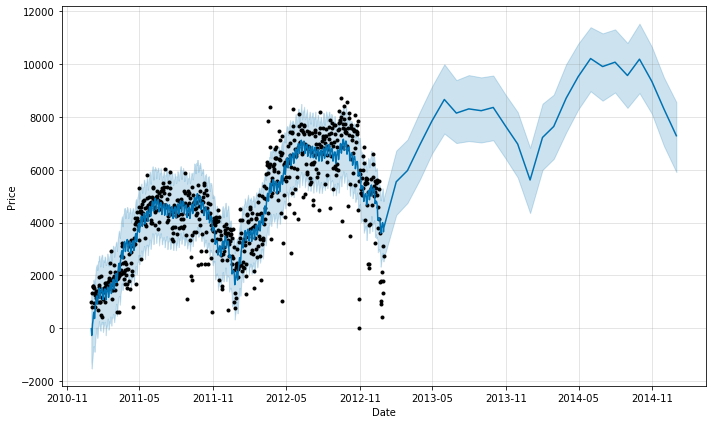

In [63]:
# Plot the future
figure = m.plot(forecast, xlabel ='Date', ylabel = 'Price')

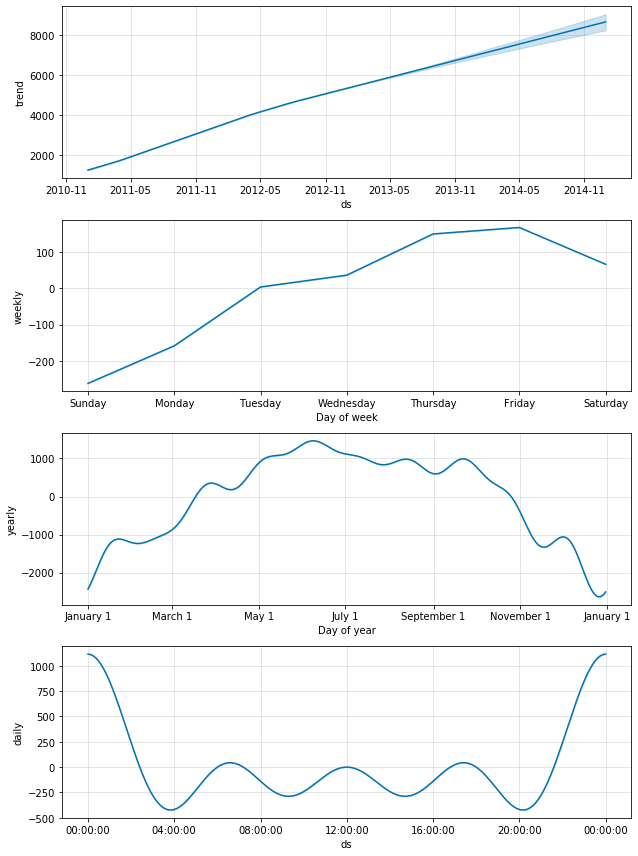

In [64]:
# Plot the components
figure = m.plot_components(forecast)